In [9]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets, decomposition
from scipy.stats import shapiro
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans


### Keep in mind to not use the full data set, but keep a part separate for the code validation!

Descriptors calculated, filtered, and saved to C:/Users/20192891/Documents/Master/Q4/8CC00/Assignment 3/output_descriptors_filtered.csv
Removed descriptors log saved to C:/Users/20192891/Documents/Master/Q4/8CC00/Assignment 3/removed_descriptors_log.csv
Correlation with inhibition results saved to C:/Users/20192891/Documents/Master/Q4/8CC00/Assignment 3/descriptor_inhibition_correlation.csv


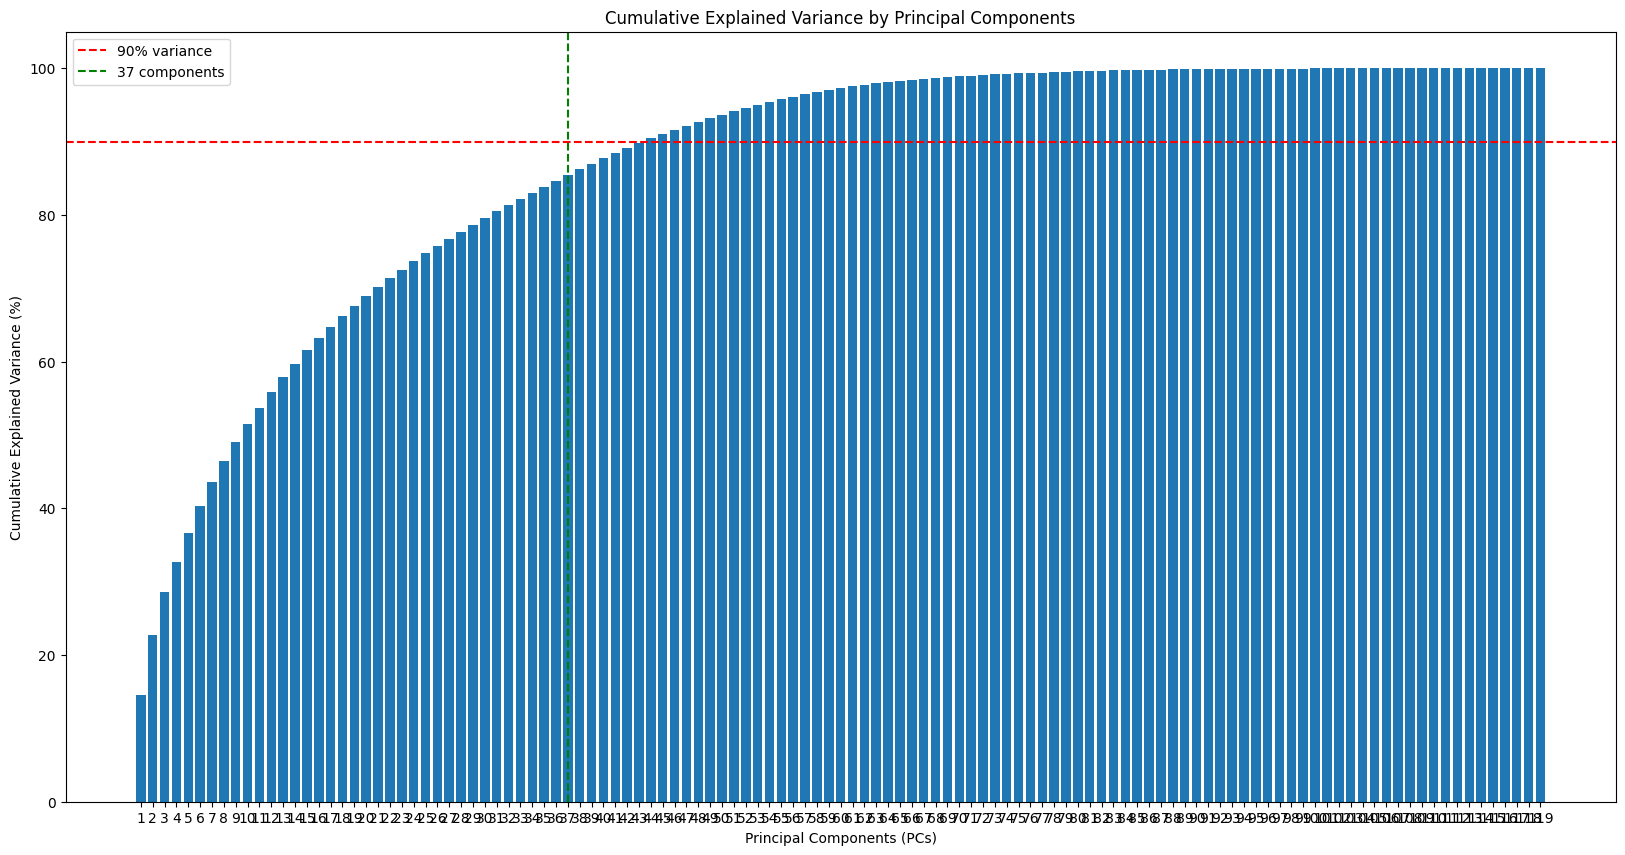

array([ 14.48903442,  22.76296445,  28.54322133,  32.64923262,
        36.69156258,  40.31056174,  43.54511071,  46.46200062,
        49.01123053,  51.48742553,  53.74360234,  55.91227541,
        57.90660157,  59.74825169,  61.54183266,  63.21812797,
        64.78669313,  66.26530689,  67.61450715,  68.92092968,
        70.17536825,  71.41252901,  72.56386019,  73.7033724 ,
        74.79730208,  75.81521825,  76.79162149,  77.75680793,
        78.70928568,  79.61368254,  80.49254624,  81.34218912,
        82.18862925,  83.02721193,  83.84799657,  84.65796579,
        85.4458307 ,  86.21918023,  86.98145721,  87.7340523 ,
        88.47700629,  89.19602995,  89.84493418,  90.4587385 ,
        91.04387929,  91.6084017 ,  92.16262653,  92.70068526,
        93.21376508,  93.70133607,  94.15842274,  94.60330572,
        95.03013812,  95.42936237,  95.79722046,  96.1611826 ,
        96.48177492,  96.78187635,  97.05603857,  97.31367038,
        97.56636947,  97.7605424 ,  97.94461136,  98.10

In [6]:
from sklearn.decomposition import PCA
file_path = "C:/Users/20192891/Documents/Master/Q4/8CC00/Assignment 3/filtered_molecules222.csv"
  # Replace with your desired output file path
data = pd.read_csv(file_path)
scaler = StandardScaler()
electrode_data = data.iloc[:, 3:]
electrode_data_scaled = scaler.fit_transform(electrode_data)
electrode_data_scaled = pd.DataFrame(electrode_data_scaled, columns=electrode_data.columns)
pca = PCA()
principalComponents = pca.fit_transform(electrode_data_scaled)
principalDf = pd.DataFrame(data = principalComponents)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_) * 100
num_components_90 = np.argmax(cumulative_explained_variance >= 85) + 1

# Plot cumulative explained variance
plt.figure(figsize=(20, 10))
plt.bar(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, tick_label=range(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=90, color='r', linestyle='--', label='90% variance')
plt.axvline(x=num_components_90, color='g', linestyle='--', label=f'{num_components_90} components')
plt.xlabel('Principal Components (PCs)')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by Principal Components')
plt.legend()
plt.show()
cumulative_explained_variance
#print(f'Number of components needed to explain 90% variance: {num_components_90}')

In [32]:
pca.explained_variance_ratio_*100
abs(pca.components_[0])

array([0.14100857, 0.104071  , 0.09638928, 0.12380714, 0.02214144,
       0.21784544, 0.06701441, 0.05668035, 0.04590519, 0.02224182,
       0.02707578, 0.08337601, 0.10212822, 0.03272438, 0.13261161,
       0.01171531, 0.0907332 , 0.12379493, 0.09533679, 0.17898404,
       0.15097464, 0.01029467, 0.21176507, 0.13722755, 0.17970346,
       0.05251182, 0.06457024, 0.12191173, 0.11713519, 0.03750536,
       0.11713329, 0.06991214, 0.00136304, 0.0350285 , 0.02237802,
       0.07572882, 0.07201337, 0.11780194, 0.14997525, 0.04124608,
       0.01232087, 0.03558625, 0.00980784, 0.05073279, 0.13382752,
       0.05732564, 0.04137007, 0.15202213, 0.04100024, 0.12748479,
       0.05428697, 0.1409598 , 0.13725345, 0.00637111, 0.04884225,
       0.05453111, 0.02533622, 0.02045037, 0.18401089, 0.08718425,
       0.10153175, 0.1331259 , 0.14589299, 0.0231068 , 0.02607391,
       0.10736707, 0.02028789, 0.0191371 , 0.07962917, 0.07406708,
       0.04548514, 0.119374  , 0.0200597 , 0.02441251, 0.00481

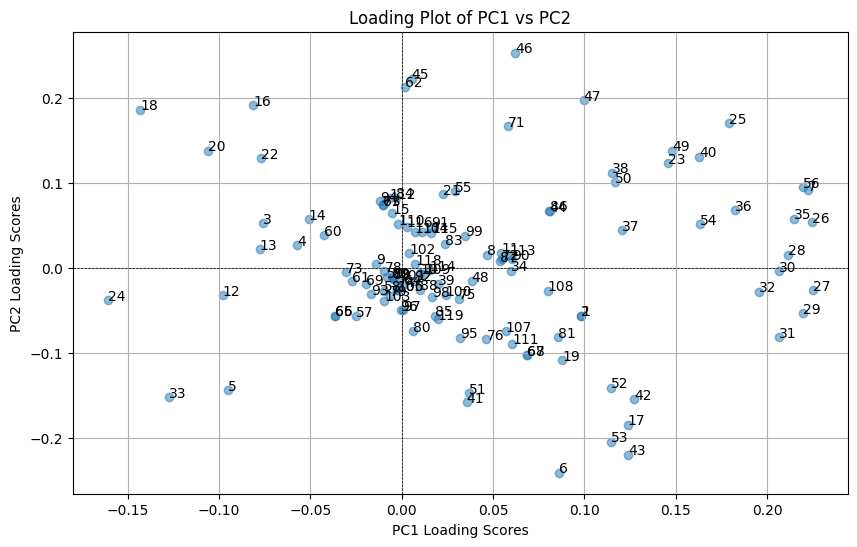

In [7]:
# Get the loading scores for PC1 and
# Generate integer feature names
feature_names = np.arange(1, len(pca.components_[0]) + 1)

# Plot loading scores
plt.figure(figsize=(10, 6))
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.5)
plt.title('Loading Plot of PC1 vs PC2')
plt.xlabel('PC1 Loading Scores')
plt.ylabel('PC2 Loading Scores')

# Add feature names to points
for i, feature_name in enumerate(feature_names):
    plt.text(pca.components_[0][i], pca.components_[1][i], str(feature_name))

plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)


In [11]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate descriptors for a single molecule
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * len(descriptor_names)
    return calculator.CalcDescriptors(mol)

# Read the input CSV file
input_csv = "C:/Users/20192891/Documents/Master/Q4/8CC00/Assignment 3/filtered_molecules222.csv"
  # Replace with your input file path
df = pd.read_csv(input_csv)

# Ensure the CSV has a column named 'SMILES' and inhibition columns
required_columns = ['SMILES', 'PKM2_inhibition', 'ERK2_inhibition']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Input CSV file must contain a '{col}' column.")

# Get list of descriptor names
descriptor_names = [desc[0] for desc in Descriptors._descList]

# Create a MolecularDescriptorCalculator
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

# Calculate descriptors for each SMILES string and store in a new DataFrame
descriptors_df = pd.DataFrame(df['SMILES'].apply(calculate_descriptors).tolist(), columns=descriptor_names)

# Check for empty cells (NaNs)
if descriptors_df.isnull().values.any():
    print("Warning: There are empty cells in the descriptors data.")

# Concatenate the original DataFrame with the descriptors DataFrame
result_df = pd.concat([df, descriptors_df], axis=1)

# Log removed descriptors
removed_descriptors = []

# Filter out descriptors with low variance
def low_variance_filter(df, threshold=0.01):
    variances = df.var()
    low_variance_cols = variances[variances <= threshold].index
    removed_descriptors.extend([(col, 'Low Variance') for col in low_variance_cols])
    return df.loc[:, variances > threshold]

# Filter out highly correlated descriptors, keeping the one with higher variance
def high_correlation_filter(df, threshold=0.95):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    to_drop = set()
    for column in upper_triangle.columns:
        for row in upper_triangle.index:
            if upper_triangle.at[row, column] > threshold:
                # Compare variances and keep the one with higher variance
                if df[column].var() >= df[row].var():
                    to_drop.add(row)
                else:
                    to_drop.add(column)

    removed_descriptors.extend([(col, 'High Correlation') for col in to_drop])
    return df.drop(columns=to_drop)

# Apply filters
descriptors_df_filtered = low_variance_filter(descriptors_df)
descriptors_df_filtered = high_correlation_filter(descriptors_df_filtered)

scaler = MinMaxScaler()
descriptors_df_scaled = pd.DataFrame(scaler.fit_transform(descriptors_df_filtered), columns=descriptors_df_filtered.columns)


# Perform PCA
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(descriptors_df_scaled)
pca_df = pd.DataFrame(data=pca_scores, columns=['PC43', 'PC44'])

# Add inhibition data to PCA DataFrame
pca_df['PKM2_inhibition'] = df['PKM2_inhibition']
pca_df['ERK2_inhibition'] = df['ERK2_inhibition']

# Define color coding based on inhibition properties
def inhibition_label(row):
    if row['PKM2_inhibition'] and row['ERK2_inhibition']:
        return 'Both'
    elif row['ERK2_inhibition']:
        return 'ERK2'
    elif row['PKM2_inhibition']:
        return 'PKM2'
    else:
        return 'Neither'

pca_df['Inhibition'] = pca_df.apply(inhibition_label, axis=1)

# Plot PC1 vs PC2
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC43', y='PC44', hue='Inhibition', style='Inhibition', data=pca_df, palette='Set1', s=100)
plt.title('PCA Score Plot (PC1 vs PC2)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Inhibition')
plt.grid(True)
plt.tight_layout()

# Save the plot
plot_file = 'pca_score_plot.png'
plt.savefig(plot_file)

# Show the plot
plt.show()

print(f"PCA score plot saved to {plot_file}")


ValueError: could not convert string to float: 'C=C(C)c1nc(N)nc(N)n1'

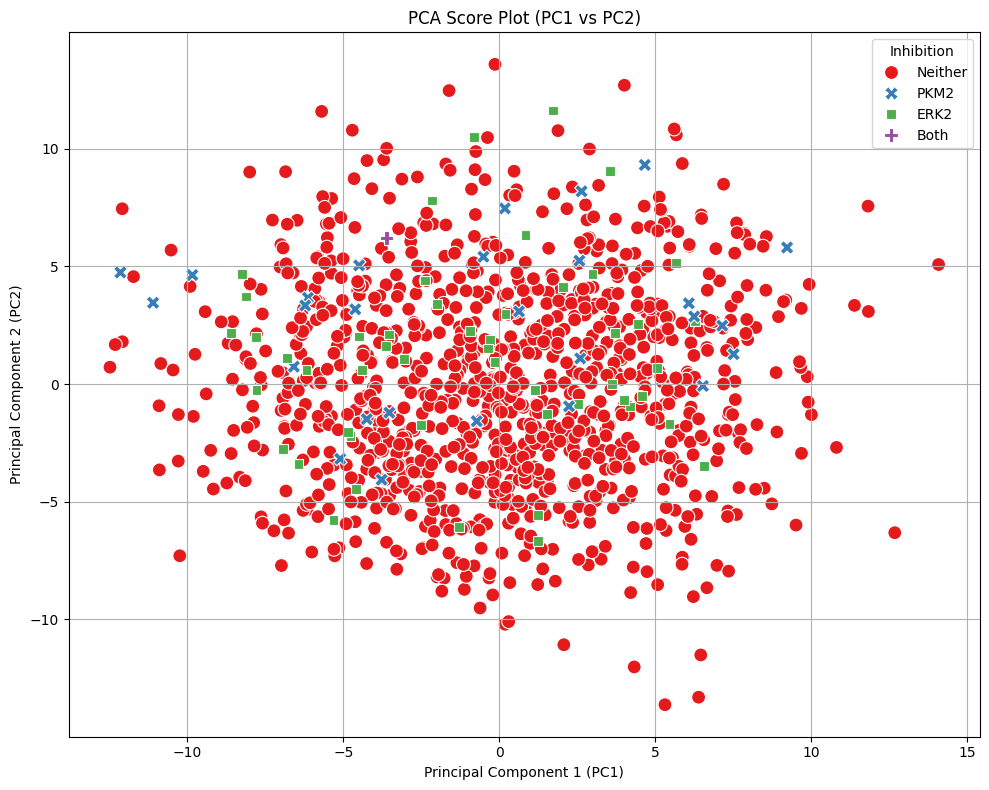

PCA score plot saved to pca_score_plot.png


In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate descriptors for a single molecule
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * len(descriptor_names)
    return calculator.CalcDescriptors(mol)

# Function to calculate fingerprints for a single molecule
def calculate_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * fp_length
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=fp_length)
    return list(fp)

# Read the input CSV file
input_csv = "C:/Users/20192891/Documents/Master/Q4/8CC00/Assignment 3/tested_molecules.csv"  # Replace with your input file path
df = pd.read_csv(input_csv)

# Ensure the CSV has a column named 'SMILES' and inhibition columns
required_columns = ['SMILES', 'PKM2_inhibition', 'ERK2_inhibition']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Input CSV file must contain a '{col}' column.")

# Get list of descriptor names
descriptor_names = [desc[0] for desc in Descriptors._descList]

# Create a MolecularDescriptorCalculator
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

# Calculate descriptors for each SMILES string and store in a new DataFrame
descriptors_df = pd.DataFrame(df['SMILES'].apply(calculate_descriptors).tolist(), columns=descriptor_names)

# Calculate fingerprints for each SMILES string and store in a new DataFrame
fp_length = 2048  # Length of the fingerprint vector
fingerprints_df = pd.DataFrame(df['SMILES'].apply(calculate_fingerprint).tolist(), columns=[f'FP_{i}' for i in range(fp_length)])

# Check for empty cells (NaNs)
if descriptors_df.isnull().values.any() or fingerprints_df.isnull().values.any():
    print("Warning: There are empty cells in the descriptors or fingerprints data.")

# Concatenate descriptors and fingerprints
combined_df = pd.concat([descriptors_df, fingerprints_df], axis=1)

# Log removed descriptors
removed_descriptors = []

# Filter out descriptors with low variance
def low_variance_filter(df, threshold=0.01):
    variances = df.var()
    low_variance_cols = variances[variances <= threshold].index
    removed_descriptors.extend([(col, 'Low Variance') for col in low_variance_cols])
    return df.loc[:, variances > threshold]

# Filter out highly correlated descriptors, keeping the one with higher variance
def high_correlation_filter(df, threshold=0.95):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    to_drop = set()
    for column in upper_triangle.columns:
        for row in upper_triangle.index:
            if upper_triangle.at[row, column] > threshold:
                # Compare variances and keep the one with higher variance
                if df[column].var() >= df[row].var():
                    to_drop.add(row)
                else:
                    to_drop.add(column)

    removed_descriptors.extend([(col, 'High Correlation') for col in to_drop])
    return df.drop(columns=to_drop)

# Apply filters
combined_df_filtered = low_variance_filter(combined_df)
combined_df_filtered = high_correlation_filter(combined_df_filtered)

# Standardize the data
scaler = StandardScaler()
combined_df_scaled = pd.DataFrame(scaler.fit_transform(combined_df_filtered), columns=combined_df_filtered.columns)

# Perform PCA
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(combined_df_scaled)
pca_df = pd.DataFrame(data=pca_scores, columns=['PC1', 'PC2'])

# Add inhibition data to PCA DataFrame
pca_df['ERK2_inhibition'] = df['ERK2_inhibition']
pca_df['PKM2_inhibition'] = df['PKM2_inhibition']

# Define color coding based on inhibition properties
def inhibition_label(row):
    if row['ERK2_inhibition'] and row['PKM2_inhibition']:
        return 'Both'
    elif row['ERK2_inhibition']:
        return 'ERK2'
    elif row['PKM2_inhibition']:
        return 'PKM2'
    else:
        return 'Neither'

pca_df['Inhibition'] = pca_df.apply(inhibition_label, axis=1)

# Plot PC1 vs PC2
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Inhibition', style='Inhibition', data=pca_df, palette='Set1', s=100)
plt.title('PCA Score Plot (PC1 vs PC2)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Inhibition')
plt.grid(True)
plt.tight_layout()

# Save the plot
plot_file = 'pca_score_plot.png'
plt.savefig(plot_file)

# Show the plot
plt.show()

print(f"PCA score plot saved to {plot_file}")


## Zonder fingerprints


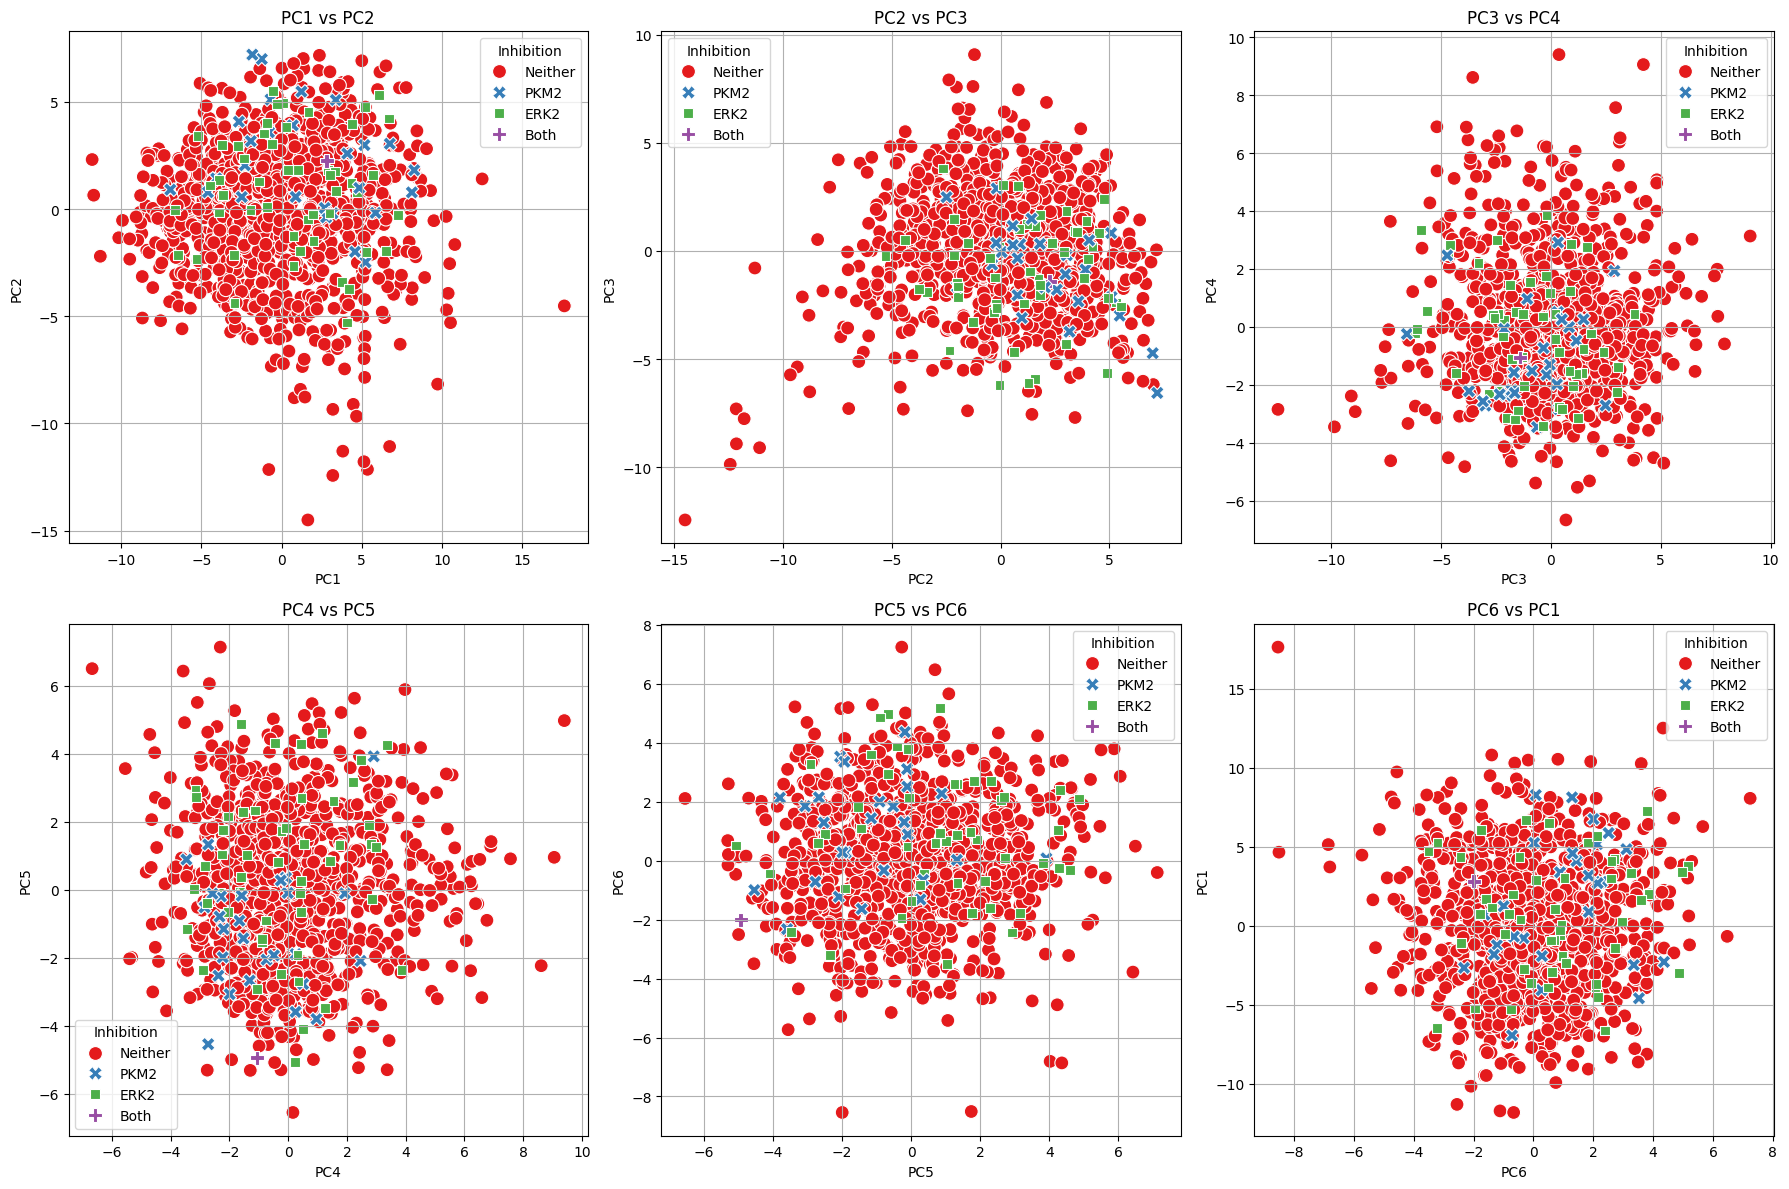

PCA score plot saved to pca_score_plot_grid.png

Top 3 loadings for PC1:
Chi2n: 0.2250
Chi1v: 0.2245
MolWt: 0.2223

Top 3 loadings for PC2:
NumAromaticRings: 0.2534
SPS: -0.2414
NumAromaticHeterocycles: 0.2229

Top 3 loadings for PC3:
fr_C_O_noCOO: 0.2286
fr_C_O: 0.2286
RingCount: -0.2168

Top 3 loadings for PC4:
NHOHCount: 0.3100
NumHDonors: 0.3039
fr_quatN: 0.2846

Top 3 loadings for PC5:
NumAromaticCarbocycles: 0.3048
fr_benzene: 0.3043
FpDensityMorgan1: -0.2801

Top 3 loadings for PC6:
fr_sulfonamd: 0.2485
MinEStateIndex: -0.2235
MinPartialCharge: 0.1920


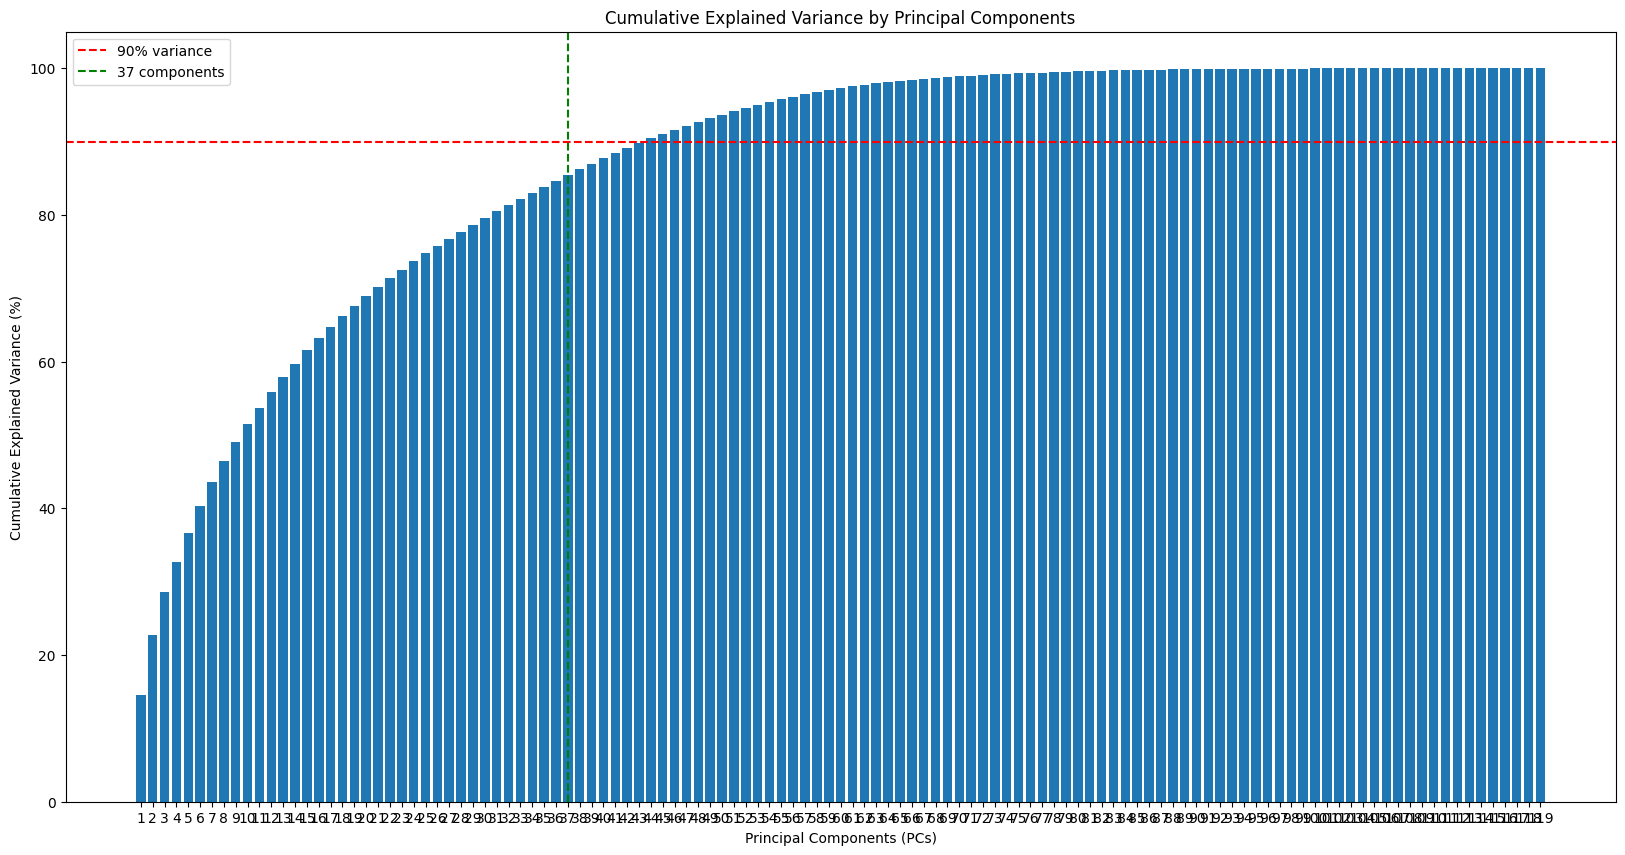

Number of components needed to explain 90% variance: 37


In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Read the input CSV file
input_csv = "C:/Users/20192891/Documents/Master/Q4/8CC00/Assignment 3/filtered_molecules222.csv"
df = pd.read_csv(input_csv)

# Ensure the CSV has the necessary columns
required_columns = ['SMILES', 'PKM2_inhibition', 'ERK2_inhibition']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Input CSV file must contain a '{col}' column.")

# Extract the descriptors (assuming all columns except 'SMILES', 'PKM2_inhibition', 'ERK2_inhibition' are descriptors)
descriptor_names = df.columns.drop(required_columns)
descriptors_df = df[descriptor_names]

# Check for empty cells (NaNs)
if descriptors_df.isnull().values.any():
    print("Warning: There are empty cells in the descriptors data.")

# Standardize the data
scaler = StandardScaler()
combined_df_scaled = pd.DataFrame(scaler.fit_transform(descriptors_df), columns=descriptors_df.columns)

# Perform PCA
pca = PCA()
pca_scores = pca.fit_transform(combined_df_scaled)
pca_df = pd.DataFrame(data=pca_scores, columns=[f'PC{i+1}' for i in range(pca_scores.shape[1])])
 
# Add inhibition data to PCA DataFrame
pca_df['ERK2_inhibition'] = df['ERK2_inhibition']
pca_df['PKM2_inhibition'] = df['PKM2_inhibition']

def inhibition_label(row):
    """
    Label the inhibition property based on inhibition values.

    Parameters:
    - row (pd.Series): Row of the DataFrame containing inhibition values.

    Returns:
    - str: Label indicating inhibition property.
    """
    if row['ERK2_inhibition'] and row['PKM2_inhibition']:
        return 'Both'
    elif row['ERK2_inhibition']:
        return 'ERK2'
    elif row['PKM2_inhibition']:
        return 'PKM2'
    else:
        return 'Neither'

pca_df['Inhibition'] = pca_df.apply(inhibition_label, axis=1)

# Plotting PC pairs
pairs = [('PC1', 'PC2'), ('PC2', 'PC3'), ('PC3', 'PC4'), ('PC4', 'PC5'), ('PC5', 'PC6'), ('PC6', 'PC1')]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for ax, (pc_x, pc_y) in zip(axes.flatten(), pairs):
    sns.scatterplot(x=pc_x, y=pc_y, hue='Inhibition', style='Inhibition', data=pca_df, palette='Set1', s=100, ax=ax)
    ax.set_title(f'{pc_x} vs {pc_y}')
    ax.set_xlabel(pc_x)
    ax.set_ylabel(pc_y)
    ax.legend(title='Inhibition')
    ax.grid(True)

plt.tight_layout()

# Save the plot
plot_file = 'pca_score_plot_grid.png'
plt.savefig(plot_file)

# Show the plot
plt.show()

print(f"PCA score plot saved to {plot_file}")

loadings = pd.DataFrame(pca.components_.T, index=descriptors_df.columns, columns=[f'PC{i+1}' for i in range(pca_scores.shape[1])])
for i in range(6):
    pc = f'PC{i+1}'
    print(f"\nTop 3 loadings for {pc}:")
    top_loadings = loadings[pc].abs().sort_values(ascending=False).head(3)
    for idx in top_loadings.index:
        print(f"{idx}: {loadings.loc[idx, pc]:.4f}")

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_) * 100
num_components_90 = np.argmax(cumulative_explained_variance >= 85) + 1

# Plot cumulative explained variance
plt.figure(figsize=(20, 10))
plt.bar(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, tick_label=range(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=90, color='r', linestyle='--', label='90% variance')
plt.axvline(x=num_components_90, color='g', linestyle='--', label=f'{num_components_90} components')
plt.xlabel('Principal Components (PCs)')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by Principal Components')
plt.legend()
plt.show()

print(f'Number of components needed to explain 90% variance: {num_components_90}')


In [13]:
# This normalization will be performed just for PC1 and PC2, but can be done for all the components.
scale1 = 1.0/(max(pca_df['PC1']) - min(pca_df['PC1']))
scale2 = 1.0/(max(pca_df['PC2']) - min(pca_df['PC2']))

# And we add the new values to our PCA table
pca_df['PC1_normalized']=[i*scale1 for i in pca_df['PC1']]
pca_df['PC2_normalized']=[i*scale2 for i in pca_df['PC2']]

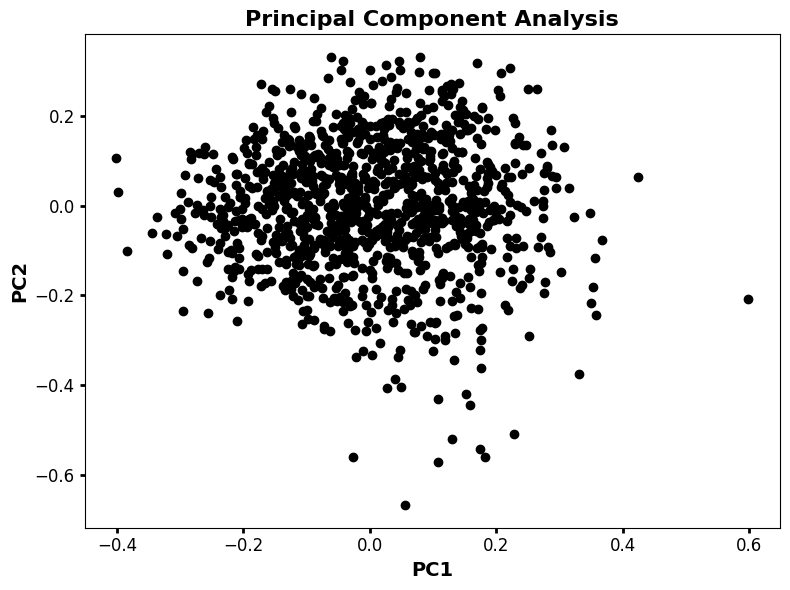

In [14]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(pca_df['PC1_normalized'],pca_df['PC2_normalized'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3165660063377658
For n_clusters = 3 The average silhouette_score is : 0.35344624993223733
For n_clusters = 4 The average silhouette_score is : 0.3551763601677817
For n_clusters = 5 The average silhouette_score is : 0.34194354415044526
For n_clusters = 6 The average silhouette_score is : 0.352985840855013
For n_clusters = 7 The average silhouette_score is : 0.3374029936051082
For n_clusters = 8 The average silhouette_score is : 0.32739886574255866
For n_clusters = 9 The average silhouette_score is : 0.33490535270138194
For n_clusters = 10 The average silhouette_score is : 0.3229358487995671


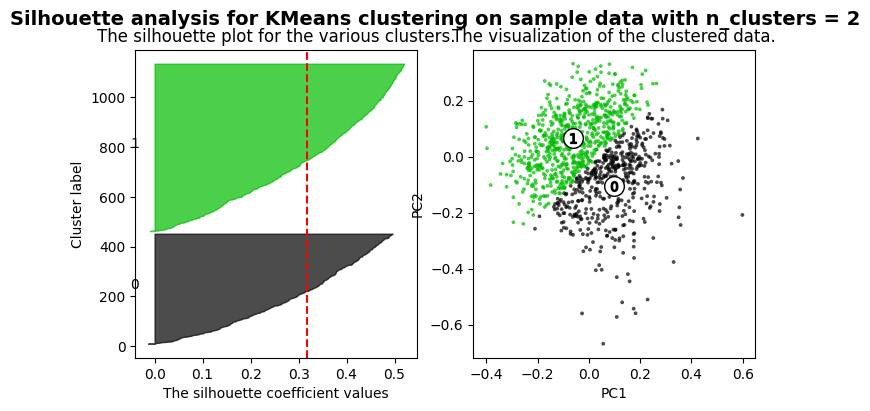

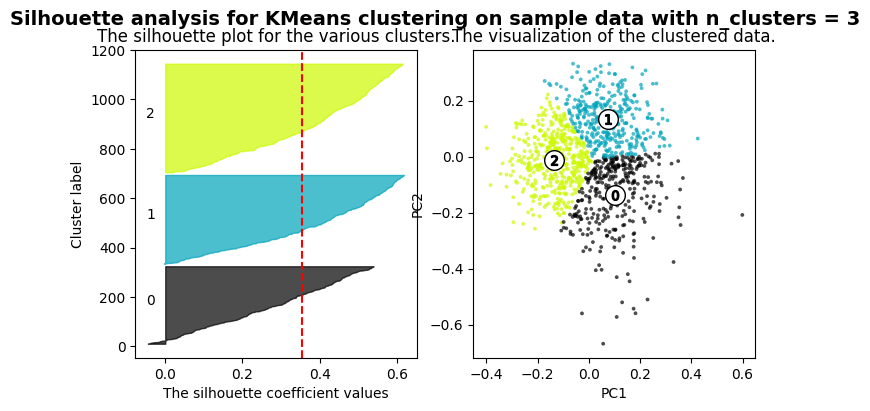

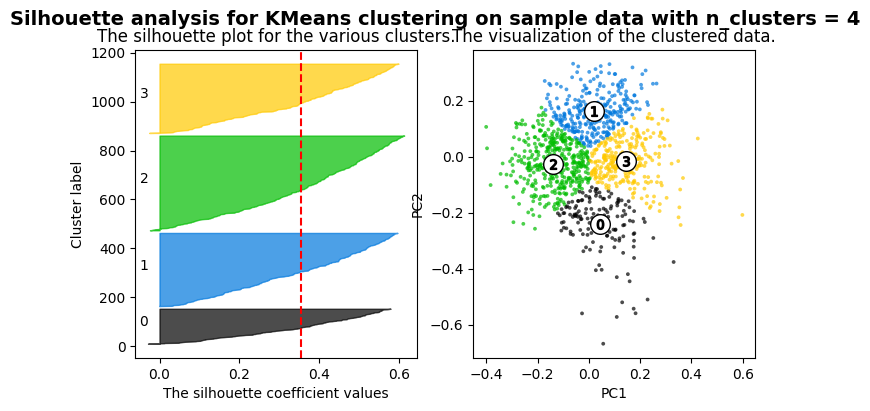

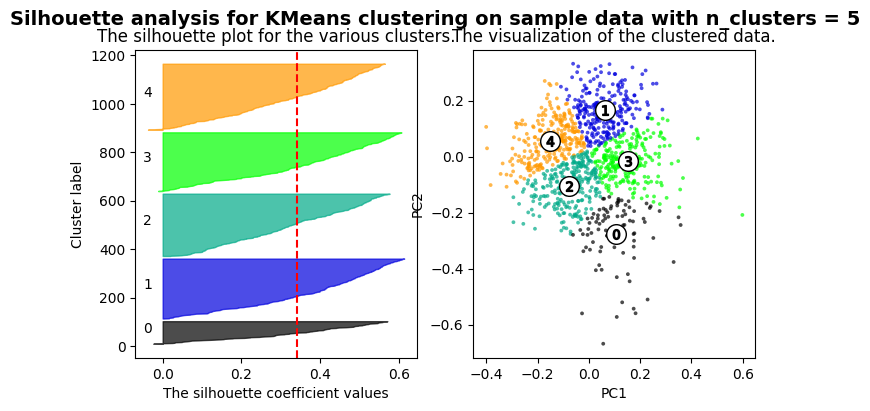

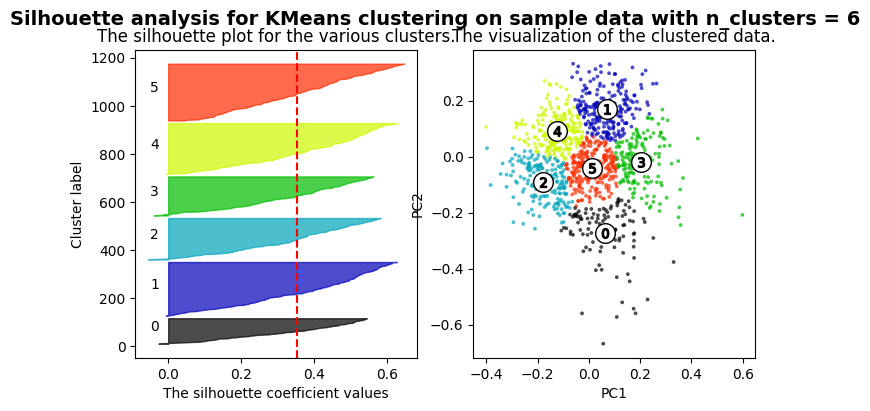

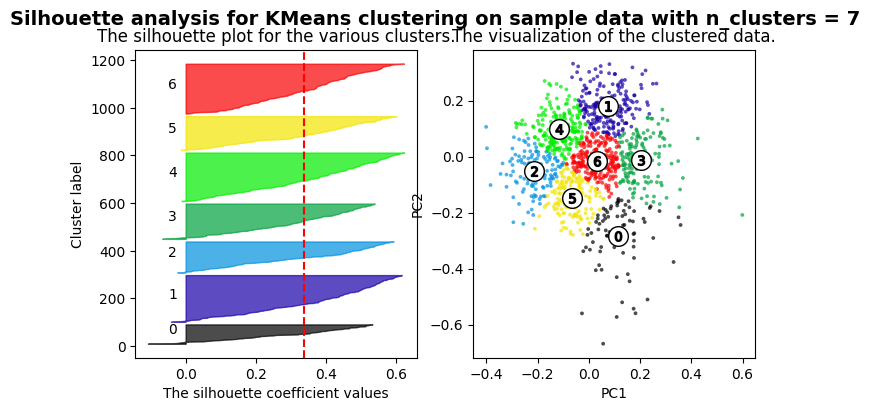

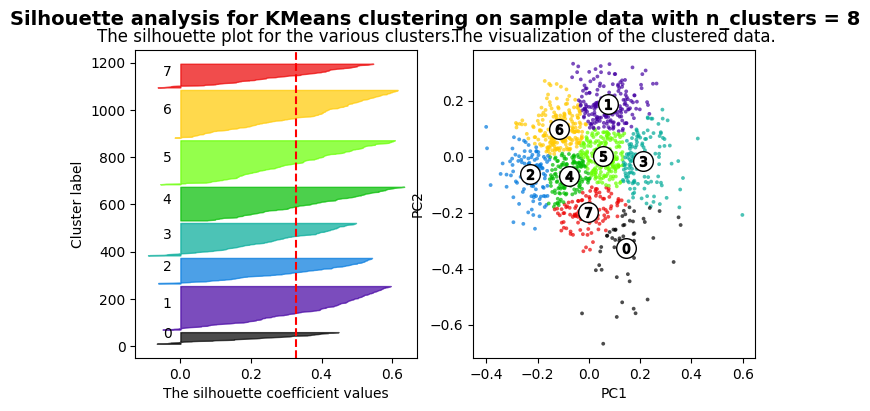

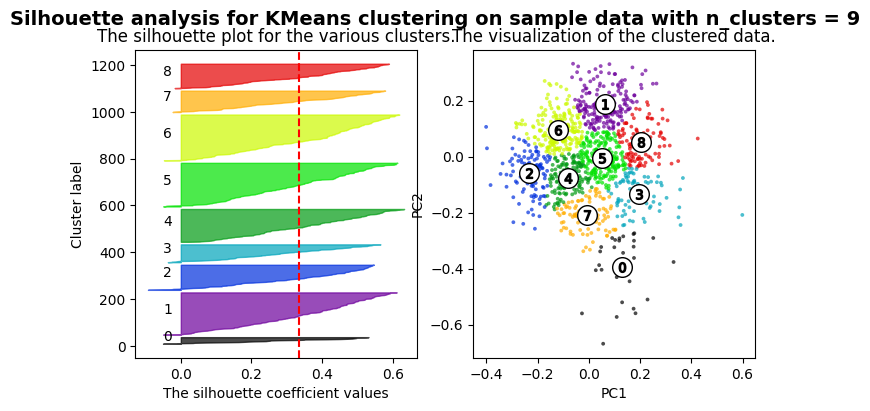

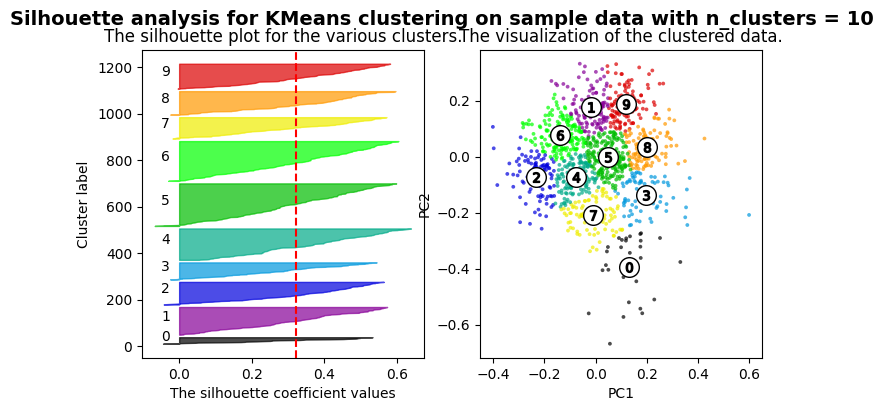

In [15]:
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
    fig, (ax1,ax2)= plt.subplots(1, 2)
    fig.set_size_inches(8, 4)

    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(pca_df[['PC1_normalized','PC2_normalized']])
    silhouette_avg = silhouette_score(pca_df[['PC1_normalized','PC2_normalized']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(pca_df[['PC1_normalized','PC2_normalized']], cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_df['PC1_normalized'], pca_df['PC2_normalized'],
                marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')


    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


plt.show()

In [16]:
kmeans = KMeans(n_clusters=4, random_state=10) # We define the best number of clusters
clusters = kmeans.fit(pca_df[['PC1_normalized','PC2_normalized']]) #PC1 vs PC2 (normalized values)

In [17]:
pca_df['Cluster_PC1_PC2'] = pd.Series(clusters.labels_, index=pca_df.index)


IndexError: list index out of range

<Figure size 1000x800 with 0 Axes>

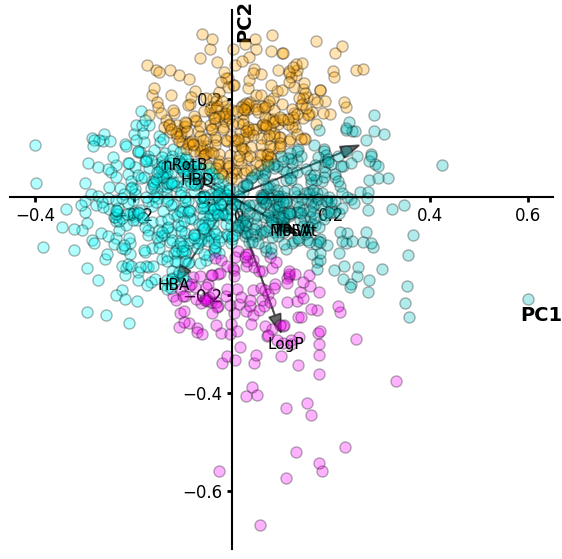

In [18]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(10,8))

fig, ax = plt.subplots(figsize=(7,7))

color_code={ 0:        'magenta',\
             1.0:   'orange',\
             2.0:      'cyan',\
             3.0:           'c',\
             4.0:        'm',\
             5.0:        'y',\
             6.0:        'darkorange',
             7.0:       'k',
             }

for i in pca_df.index:
        ax.plot(pca_df.loc[i].at['PC1_normalized'],pca_df.loc[i].at['PC2_normalized'],
                    c=color_code[pca_df.loc[i].at['Cluster_PC1_PC2']],
                    marker='o',markersize=8,markeredgecolor='k',alpha=0.3)


plt.xlabel ('PC1',fontsize=14,fontweight='bold')
ax.xaxis.set_label_coords(0.98, 0.45)
plt.ylabel ('PC2',fontsize=14,fontweight='bold')
ax.yaxis.set_label_coords(0.45, 0.98)
plt.tick_params ('both',width=2,labelsize=12)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

lab=['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP'] #Feature labels

l=np.transpose(pca.components_[0:2, :]) ## We will get the components eigenvectors (main features) for PC1 and PC2

n = l.shape[0]
for i in range(n):
    plt.arrow(0, 0, l[i,0], l[i,1],color= 'k',alpha=0.6,linewidth=1.2,head_width=0.025)
    plt.text(l[i,0]*1.25, l[i,1]*1.25, lab[i], color = 'k',va = 'center', ha = 'center',fontsize=11)

circle = plt.Circle((0,0), 1, color='gray', fill=False,clip_on=True,linewidth=1.5,linestyle='--')
ax.add_artist(circle)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.tight_layout()
plt.show()

In [19]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[1.44890344e-01 8.27393004e-02 5.78025688e-02 4.10601129e-02
 4.04232996e-02 3.61899916e-02 3.23454898e-02 2.91688990e-02
 2.54922992e-02 2.47619500e-02 2.25617681e-02 2.16867308e-02
 1.99432616e-02 1.84165011e-02 1.79358098e-02 1.67629531e-02
 1.56856516e-02 1.47861376e-02 1.34920026e-02 1.30642253e-02
 1.25443857e-02 1.23716077e-02 1.15133117e-02 1.13951221e-02
 1.09392968e-02 1.01791617e-02 9.76403240e-03 9.65186436e-03
 9.52477754e-03 9.04396859e-03 8.78863703e-03 8.49642879e-03
 8.46440124e-03 8.38582689e-03 8.20784637e-03 8.09969220e-03
 7.87864909e-03 7.73349532e-03 7.62276972e-03 7.52595095e-03
 7.42953990e-03 7.19023659e-03 6.48904228e-03 6.13804321e-03
 5.85140795e-03 5.64522405e-03 5.54224828e-03 5.38058732e-03
 5.13079821e-03 4.87570987e-03 4.57086676e-03 4.44882980e-03
 4.26832395e-03 3.99224256e-03 3.67858091e-03 3.63962140e-03
 3.20592313e-03 3.00101437e-03 2.74162212e-03 2.57631815e-03
 2.52699087e-03 1.94172937e-03 1.84068952e-03 1.63149693e-03
 1.59359443e-03 1.494339

## Hoeveel PCs?

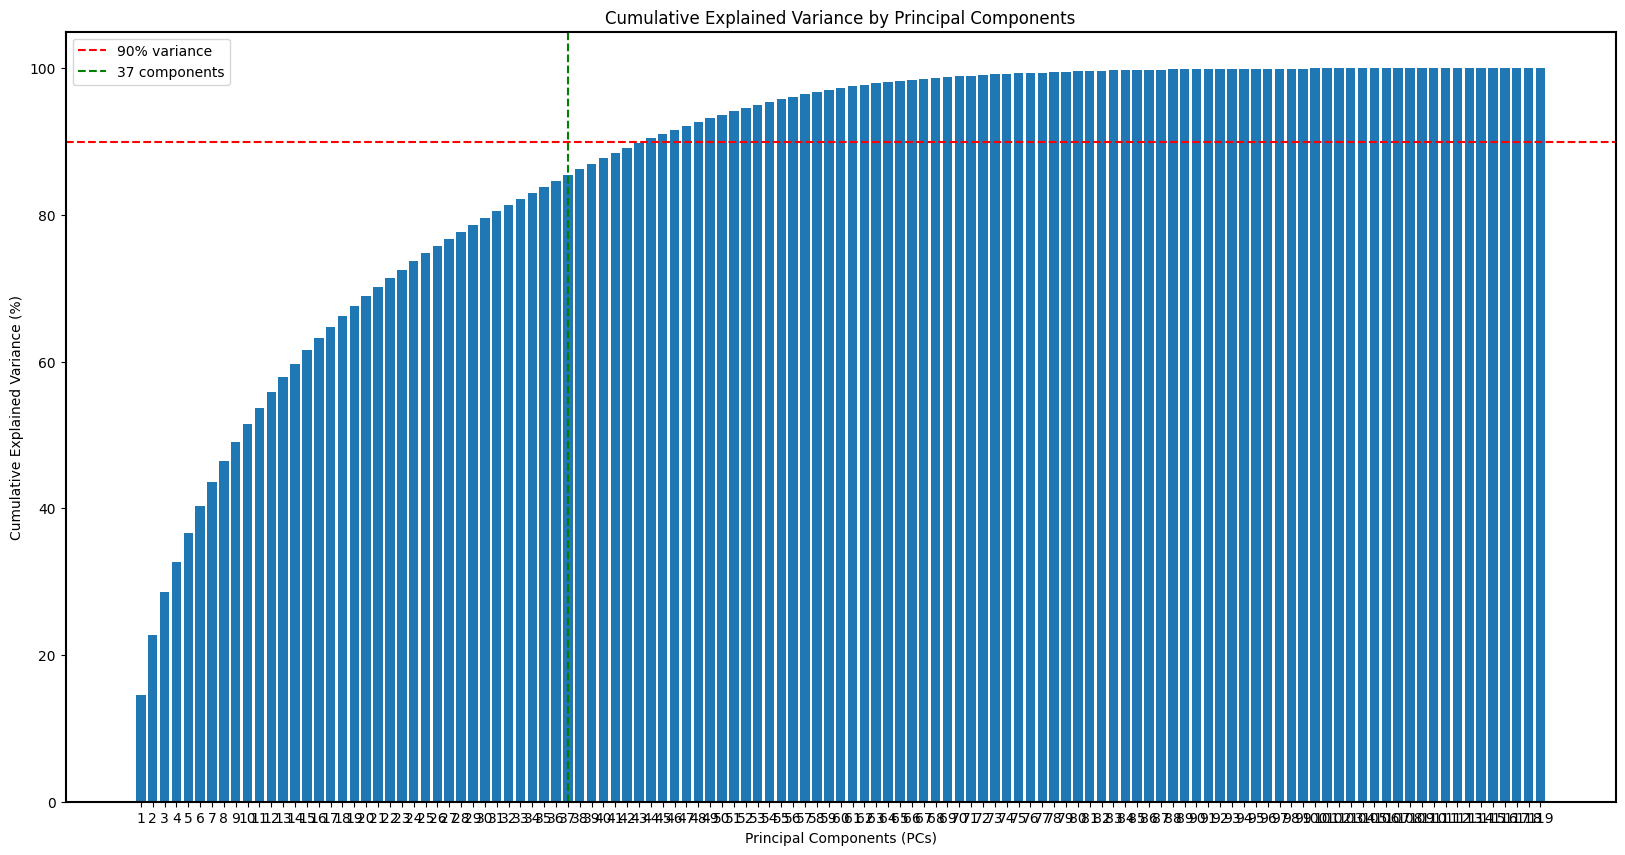

array([ 14.48903442,  22.76296445,  28.54322133,  32.64923262,
        36.69156258,  40.31056174,  43.54511071,  46.46200062,
        49.01123053,  51.48742553,  53.74360234,  55.91227541,
        57.90660157,  59.74825169,  61.54183266,  63.21812797,
        64.78669313,  66.26530689,  67.61450715,  68.92092968,
        70.17536825,  71.41252901,  72.56386019,  73.7033724 ,
        74.79730208,  75.81521825,  76.79162149,  77.75680793,
        78.70928568,  79.61368254,  80.49254624,  81.34218912,
        82.18862925,  83.02721193,  83.84799657,  84.65796579,
        85.4458307 ,  86.21918023,  86.98145721,  87.7340523 ,
        88.47700629,  89.19602995,  89.84493418,  90.4587385 ,
        91.04387929,  91.6084017 ,  92.16262653,  92.70068526,
        93.21376508,  93.70133607,  94.15842274,  94.60330572,
        95.03013812,  95.42936237,  95.79722046,  96.1611826 ,
        96.48177492,  96.78187635,  97.05603857,  97.31367038,
        97.56636947,  97.7605424 ,  97.94461136,  98.10

In [20]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_) * 100
num_components_90 = np.argmax(cumulative_explained_variance >= 85) + 1

# Plot cumulative explained variance
plt.figure(figsize=(20, 10))
plt.bar(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, tick_label=range(1, len(cumulative_explained_variance) + 1))
plt.axhline(y=90, color='r', linestyle='--', label='90% variance')
plt.axvline(x=num_components_90, color='g', linestyle='--', label=f'{num_components_90} components')
plt.xlabel('Principal Components (PCs)')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by Principal Components')
plt.legend()
plt.show()
cumulative_explained_variance
#print(f'Number of components needed to explain 90% variance: {num_components_90}')

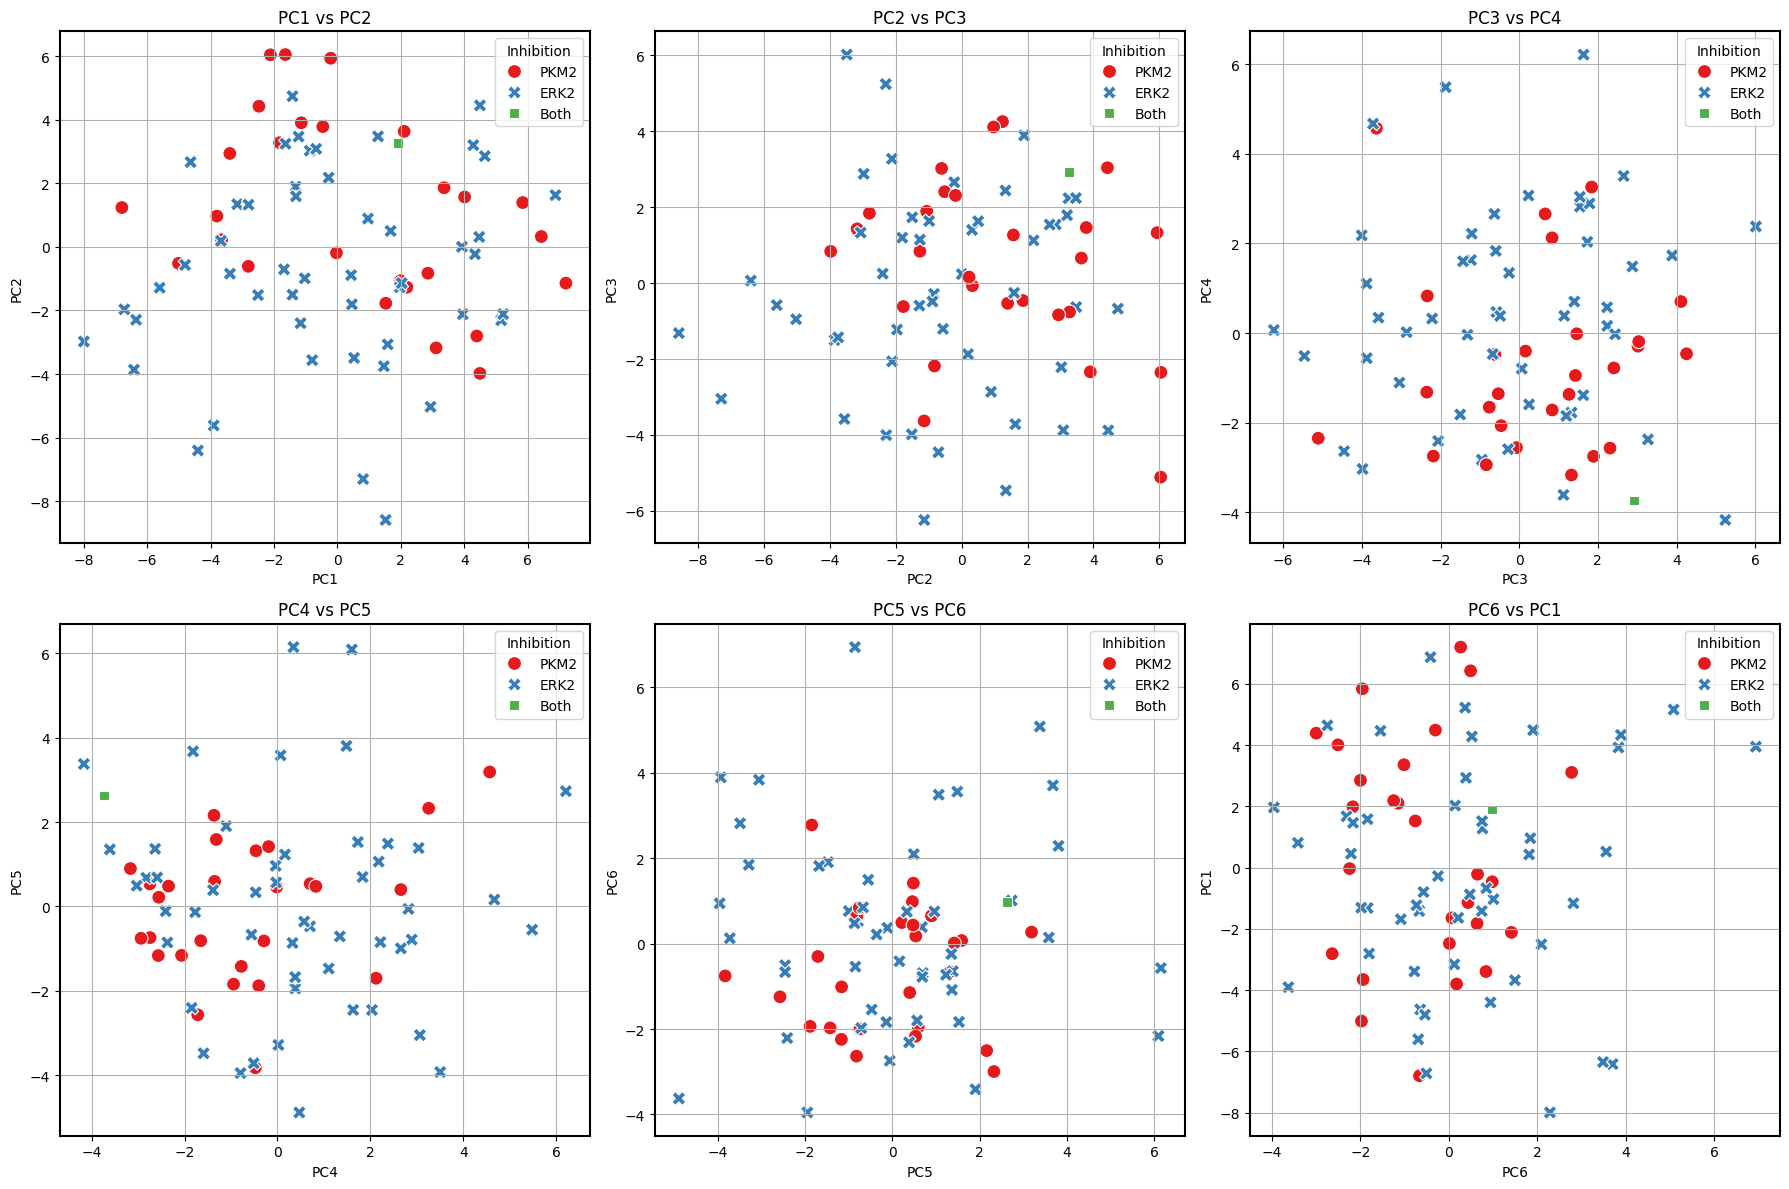

PCA score plot saved to pca_score_plot_grid_filtered.png

Top 3 loadings for PC1:
MolWt: 0.2645
Chi1v: 0.2590
MolMR: 0.2542

Top 3 loadings for PC2:
NumAromaticHeterocycles: 0.2571
NumHAcceptors: 0.2331
fr_Ar_N: 0.2300

Top 3 loadings for PC3:
FpDensityMorgan1: 0.2681
MinAbsEStateIndex: -0.2415
fr_C_O_noCOO: 0.2404

Top 3 loadings for PC4:
NumHDonors: 0.3231
NHOHCount: 0.3147
fr_NH1: 0.2998

Top 3 loadings for PC5:
fr_quatN: 0.2541
BCUT2D_LOGPLOW: -0.2304
fr_pyridine: 0.1997

Top 3 loadings for PC6:
NumAliphaticCarbocycles: 0.2806
BCUT2D_MWLOW: -0.2717
MinEStateIndex: 0.2518


In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Read the input CSV file
input_csv = "C:/Users/20192891/Documents/Master/Q4/8CC00/Assignment 3/filtered_molecules222.csv"
  # Replace with your input file path
df = pd.read_csv(input_csv)

# Ensure the CSV has a column named 'SMILES' and inhibition columns
required_columns = ['SMILES',  'PKM2_inhibition', 'ERK2_inhibition']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Input CSV file must contain a '{col}' column.")

# Filter out molecules that inhibit neither ERK2 nor PKM2
df = df[~((df['ERK2_inhibition'] == False) & (df['PKM2_inhibition'] == False))]

# Extract the descriptors (assuming all columns except 'SMILES', 'PKM2_inhibition', 'ERK2_inhibition' are descriptors)
descriptor_names = df.columns.drop(required_columns)
combined_df = df[descriptor_names]

# Check for empty cells (NaNs)
if combined_df.isnull().values.any():
    print("Warning: There are empty cells in the descriptors data.")

# Log removed descriptors
removed_descriptors = []

# Filter out descriptors with low variance
def low_variance_filter(df, threshold=0.01):
    variances = df.var()
    low_variance_cols = variances[variances <= threshold].index
    removed_descriptors.extend([(col, 'Low Variance') for col in low_variance_cols])
    return df.loc[:, variances > threshold]

# Filter out highly correlated descriptors, keeping the one with higher variance
def high_correlation_filter(df, threshold=0.95):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    to_drop = set()
    for column in upper_triangle.columns:
        for row in upper_triangle.index:
            if upper_triangle.at[row, column] > threshold:
                # Compare variances and keep the one with higher variance
                if df[column].var() >= df[row].var():
                    to_drop.add(row)
                else:
                    to_drop.add(column)

    removed_descriptors.extend([(col, 'High Correlation') for col in to_drop])
    return df.drop(columns=to_drop)

# Apply filters
combined_df_filtered = low_variance_filter(combined_df)
combined_df_filtered = high_correlation_filter(combined_df_filtered)

# Standardize the data
scaler = StandardScaler()
combined_df_scaled = pd.DataFrame(scaler.fit_transform(combined_df_filtered), columns=combined_df_filtered.columns)

# Perform PCA
pca = PCA(n_components=6)
pca_scores = pca.fit_transform(combined_df_scaled)
pca_df = pd.DataFrame(data=pca_scores, columns=[f'PC{i+1}' for i in range(6)])

# Add inhibition data to PCA DataFrame
pca_df['ERK2_inhibition'] = df['ERK2_inhibition'].values
pca_df['PKM2_inhibition'] = df['PKM2_inhibition'].values

# Define color coding based on inhibition properties
def inhibition_label(row):
    if row['ERK2_inhibition'] and row['PKM2_inhibition']:
        return 'Both'
    elif row['ERK2_inhibition']:
        return 'ERK2'
    elif row['PKM2_inhibition']:
        return 'PKM2'
    else:
        return 'Neither'

pca_df['Inhibition'] = pca_df.apply(inhibition_label, axis=1)

# Plotting PC pairs
pairs = [('PC1', 'PC2'), ('PC2', 'PC3'), ('PC3', 'PC4'), ('PC4', 'PC5'), ('PC5', 'PC6'), ('PC6', 'PC1')]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for ax, (pc_x, pc_y) in zip(axes.flatten(), pairs):
    sns.scatterplot(x=pc_x, y=pc_y, hue='Inhibition', style='Inhibition', data=pca_df, palette='Set1', s=100, ax=ax)
    ax.set_title(f'{pc_x} vs {pc_y}')
    ax.set_xlabel(pc_x)
    ax.set_ylabel(pc_y)
    ax.legend(title='Inhibition')
    ax.grid(True)

plt.tight_layout()

# Save the plot
plot_file = 'pca_score_plot_grid_filtered.png'
plt.savefig(plot_file)

# Show the plot
plt.show()

print(f"PCA score plot saved to {plot_file}")

# Print top 3 loadings for each PC
loadings = pd.DataFrame(pca.components_.T, index=combined_df_filtered.columns, columns=[f'PC{i+1}' for i in range(6)])
for i in range(6):
    pc = f'PC{i+1}'
    print(f"\nTop 3 loadings for {pc}:")
    top_loadings = loadings[pc].abs().sort_values(ascending=False).head(3)
    for idx in top_loadings.index:
        print(f"{idx}: {loadings.loc[idx, pc]:.4f}")



In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the input CSV file
"C:/Users/20192891/Documents/Master/Q4/8CC00/Assignment 3/filtered_molecules222.csv"
df = pd.read_csv(input_csv)

# Ensure the CSV has the necessary columns
required_columns = ['SMILES', 'PKM2_inhibition', 'ERK2_inhibition']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Input CSV file must contain a '{col}' column.")

# Filter out molecules that inhibit neither ERK2 nor PKM2
df = df[~((df['ERK2_inhibition'] == False) & (df['PKM2_inhibition'] == False))]

# Extract the descriptors (assuming all columns except 'SMILES', 'PKM2_inhibition', 'ERK2_inhibition' are descriptors)
descriptor_names = df.columns.drop(required_columns)
descriptors_df = df[descriptor_names]

# Check for empty cells (NaNs)
if descriptors_df.isnull().values.any():
    print("Warning: There are empty cells in the descriptors data.")

# Standardize the data
scaler = MinMaxScaler()
descriptors_df_scaled = pd.DataFrame(scaler.fit_transform(descriptors_df), columns=descriptors_df.columns)

# Perform PCA
pca = PCA(n_components=40)
pca_scores = pca.fit_transform(descriptors_df_scaled)
pca_df = pd.DataFrame(data=pca_scores, columns=[f'PC{i+1}' for i in range(40)])

# Define a function to extract the top and bottom descriptors for each PC
def get_top_and_bottom_descriptors(pc_loadings, n_top=20):
    top_descriptors = pc_loadings.abs().nlargest(n_top)
    bottom_descriptors = pc_loadings.abs().nsmallest(n_top)
    return top_descriptors, bottom_descriptors

# Extract top and bottom descriptors for each PC
pc_descriptors = {}
for i in range(40):
    pc_loadings = pd.Series(pca.components_[i], index=descriptors_df.columns)
    top_descriptors, bottom_descriptors = get_top_and_bottom_descriptors(pc_loadings)
    pc_descriptors[f'PC{i+1}'] = {'top': top_descriptors, 'bottom': bottom_descriptors}

# Count appearance of descriptors in top and bottom for each PC
descriptor_counts_top = {}
descriptor_counts_bottom = {}
for pc, descriptors in pc_descriptors.items():
    for descriptor in descriptors['top'].index:
        descriptor_counts_top[descriptor] = descriptor_counts_top.get(descriptor, 0) + 1
    for descriptor in descriptors['bottom'].index:
        descriptor_counts_bottom[descriptor] = descriptor_counts_bottom.get(descriptor, 0) + 1

# Convert counts to DataFrame
top_descriptor_counts_df = pd.Series(descriptor_counts_top).sort_values(ascending=False)
bottom_descriptor_counts_df = pd.Series(descriptor_counts_bottom).sort_values(ascending=False)
pd.set_option('display.max_rows', None)  

# Display counts of descriptors in top and bottom loadings for each PC
print("Descriptor appearance count in the top 20 of first 40 PCs:")
print(top_descriptor_counts_df)

print("\nDescriptor appearance count in the bottom 20 of first 40 PCs:")
print(bottom_descriptor_counts_df)


Descriptor appearance count in the top 20 of first 40 PCs:
fr_furan                    18
fr_bicyclic                 17
fr_piperzine                17
fr_thiophene                16
fr_imidazole                16
fr_Ndealkylation2           15
fr_ester                    15
fr_piperdine                14
fr_thiazole                 14
fr_morpholine               14
fr_sulfide                  14
fr_para_hydroxylation       13
fr_nitrile                  13
BCUT2D_LOGPHI               12
fr_ether                    12
fr_pyridine                 12
MaxPartialCharge            12
fr_unbrch_alkane            12
BCUT2D_MRHI                 11
MaxAbsPartialCharge         11
fr_quatN                    11
MinAbsPartialCharge         11
fr_Al_OH                    11
fr_tetrazole                11
fr_ketone                   11
fr_ketone_Topliss           10
MaxAbsEStateIndex           10
MaxEStateIndex              10
fr_aniline                  10
NumAliphaticCarbocycles     10
fr_methoxy 